# Анализ данных по использованию мобильного приложения банка

<h2>Содержание<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Когортный-анализ" data-toc-modified-id="Когортный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Когортный анализ</a></span><ul class="toc-item"><li><span><a href="#Расчет-когорт" data-toc-modified-id="Расчет-когорт-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Расчет когорт</a></span></li><li><span><a href="#Расчет-и-визуализация-удержания" data-toc-modified-id="Расчет-и-визуализация-удержания-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Расчет и визуализация удержания</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-проникновения" data-toc-modified-id="Анализ-проникновения-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Анализ проникновения</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Описание исследования

**Цель исследования:** Ответить на вопросы по использованию мобильного приложения банка.

**Исходные данные:** Данные об активности клиентов с сентября 2021 года по февраль 2022

**Задачи исследования:** Необходимо провести когортный анализ и решить следующие задачи:

* построить визуальное представление удержания клиентов в статусе:
    * активных клиентов банка (наличие строки для клиента на отчетную дату); 
    * диджитал активных (активных в мобильном приложении: наличие хотя бы одного входа);
    * операционно активных;
    * транзакционно активных;
* сделать выводы на основе этих данных
* если построить проникновение транзакционно активных клиентов в когорты диджитал активных клиентов, то мы увидим, что существенная часть клиентов использует мобильное приложение, но не совершает транзакции (платежи и переводы) в нем. Какие гипотезы такого поведения можно предположить? Как их можно проверить?;
* как можно исправить эту ситуацию и увеличить проникновение транзакционно активных клиентов в диджитал активных?


## Изучение данных из файлов
Загрузим необходимые библиотеки.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np  # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки mathplotlib
import seaborn as sns # импорт библиотеки mathplotlib
from datetime import datetime, timedelta # импорт функций из библиотеки datetime
import warnings # импорт библиотеки warnings
warnings.filterwarnings('ignore') # отключение уведомлений об предупреждениях

Загрузим данные из файла.

In [2]:
log = pd.read_csv('data_test.csv', sep=';') # чтение данных из csv файла

Посмотрим на структуру данных в таблице.

In [3]:
log.info() # просмотр информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CLIENT_ID           805821 non-null  int64  
 1   VALUE_DAY           805821 non-null  object 
 2   DIGITAL_30_CNT      711169 non-null  float64
 3   TRAN_ACTIVE_30_CNT  711169 non-null  float64
 4   OPER_ACTIVE_30_CNT  711169 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 30.7+ MB


In [4]:
log.sample(5)  # просмотр образцов данных

,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
466132,4060921324,31.12.2021,8.0,2.0,5.0
131262,2367537375,31.10.2021,11.0,2.0,2.0
561331,3646439314,31.01.2022,3.0,1.0,1.0
618091,251474243,31.01.2022,15.0,5.0,5.0
512792,3400367511,31.12.2021,10.0,1.0,1.0


В таблице есть пропуски, это вызвано тем, что не все активные клиенты (наличие строки для клиента на отчетную дату) пользуются мобильным приложением (являются диджитал активными). Пропуски содержат важную для исследования информацию, оставим их без изменения. Типы данных во всех столбцах различаются, возможно преобразование типов некоторых колонок повысит скорость обработки данных и повысит удобство при исследовании.

### Описание данных

<pre>CLIENT_ID - идентификатор клиента; 
VALUE_DAY - отчетная дата; 
DIGITAL_30_CNT - кол-во входов в мобильное приложение за последние 30 дней на отчетную дату; 
TRAN_ACTIVE_30_CNT - кол-во транзакций в мобильном приложении за последние 30 дней на отчетную дату; 
OPER_ACTIVE_30_CNT - кол-во операций (транзакции+нефинансовые операции) в мобильном приложении за последние 30 дней на отчетную дату</pre>

### Выводы
Предварительно можно утверждать, что данных достаточно для решения поставленных задач.

В таблице есть пропуски, это вызвано тем, что не все активные клиенты (наличие строки для клиента на отчетную дату) пользуются мобильным приложением (являются диджитал активными). Пропуски содержат важную для исследования информацию, оставим их без изменения.

Типы данных во всех столбцах различаются, возможно преобразование типов некоторых колонок повысит скорость обработки данных и повысит удобство при исследовании.

Названия столбцов нарушают правила наименования и должны быть приведены в соответствии с ними.

## Предобработка данных

### Переименование столбцов

Приведем названия столбцов в соответствие с правилами именования:
- несколько слов в названии запишем в «змеином_регистре»,
- все символы сделаем строчными.

In [5]:
log.columns = log.columns.str.lower() # переименование столбцов в строчный регистр
log.columns # просмотр наименования столбцов

Index(['client_id', 'value_day', 'digital_30_cnt', 'tran_active_30_cnt',
       'oper_active_30_cnt'],
      dtype='object')

Столбцы успешно переименованы.

### Изменение типов данных

Приведем столбец с датами к типу datetime.

In [6]:
type(log.value_day[0])

str

In [7]:
# преобразуем данные о времени
try:
    log['value_day'] = pd.to_datetime(log['value_day'])
except:
    print('Ошибка преобразования типа данных')   
log.info()  # Посмотрим на результат конвертации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   client_id           805821 non-null  int64         
 1   value_day           805821 non-null  datetime64[ns]
 2   digital_30_cnt      711169 non-null  float64       
 3   tran_active_30_cnt  711169 non-null  float64       
 4   oper_active_30_cnt  711169 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 30.7 MB


Столбцы с количеством событий приведем к целому значению.

In [8]:
# преобразуем данные о времени
try:
    log['digital_30_cnt'] = log['digital_30_cnt'].astype('Int32')
    log['tran_active_30_cnt'] = log['tran_active_30_cnt'].astype('Int32')
    log['oper_active_30_cnt'] = log['oper_active_30_cnt'].astype('Int32')
except:
    print('Ошибка преобразования типа данных')   
log.info()  # Посмотрим на результат конвертации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805821 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   client_id           805821 non-null  int64         
 1   value_day           805821 non-null  datetime64[ns]
 2   digital_30_cnt      711169 non-null  Int32         
 3   tran_active_30_cnt  711169 non-null  Int32         
 4   oper_active_30_cnt  711169 non-null  Int32         
dtypes: Int32(3), datetime64[ns](1), int64(1)
memory usage: 23.8 MB


Типы данных успешно преобразованы.

### Поиск дубликатов

Проверим таблицу на наличие явных дубликатов.

In [9]:
print('Количество дублирующихся строк в таблице "log":', log.duplicated().sum()) # подсчёт явных дубликатов

Количество дублирующихся строк в таблице "log": 0


Явных дубликатов не обнаружено.

Проверим, не дублируются ли записи для одного клиента и одну дату, но с отличающимися значениями событий.

In [10]:
print('Количество дублирующихся строк в таблице "log":', log[['client_id', 'value_day']].duplicated().sum()) # подсчёт неявных дубликатов

Количество дублирующихся строк в таблице "log": 2


Такие дубликаты есть, посмотрим на них.

In [11]:
log[log[['client_id', 'value_day']].duplicated(keep=False)] # смотрим дубликаты

,client_id,value_day,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
557303,1813118018,2022-01-31,6,1,2
598226,1813118018,2022-01-31,10,2,2
724484,1813118018,2022-02-28,11,1,2
798317,1813118018,2022-02-28,3,1,2


Для клиента с id 1813118018 дублируются записи за январь и февраль 2022 года. Возможно это вызвано уточнением информации, возможно это техническая ошибка. Обратим внимание коллег. Для целей дальнейшего исследования удалим одну из повторяющихся строк.

In [12]:
log.drop_duplicates(subset=['client_id', 'value_day'], keep='first', inplace=True) # удаляем дубликаты
log.info() # смотрим результат преобразования

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805819 entries, 0 to 805820
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   client_id           805819 non-null  int64         
 1   value_day           805819 non-null  datetime64[ns]
 2   digital_30_cnt      711167 non-null  Int32         
 3   tran_active_30_cnt  711167 non-null  Int32         
 4   oper_active_30_cnt  711167 non-null  Int32         
dtypes: Int32(3), datetime64[ns](1), int64(1)
memory usage: 30.0 MB


Две строки с дублирующейся информацией удалены.

### Выводы

1. Мы привели названия столбцов в соответствие с правилами именования: пробелы в названии заменили подчеркиваниями и все символы сделали строчными.
2. В таблицах столбец `value_day` содержащие даты мы конвертировали в формат datetime. Столбцы с количеством событий привели к целому значению.
3. Для клиента с id 1813118018 дублируются записи за январь и февраль 2022 года. Возможно это вызвано уточнением информации, возможно это техническая ошибка. Обратим внимание коллег. Из дублирующихся данных удалили повторяющиеся строки.

## Исследовательский анализ данных

Посмотрим предоставленные данные.

In [13]:
log.sample(5) # смотрим образец данных

,client_id,value_day,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
314083,1672783006,2021-11-30,8,0,0
609452,1115878303,2022-01-31,20,12,13
793545,3021334182,2022-02-28,1,0,0
311972,4271994732,2021-11-30,2,0,1
448567,3119033862,2021-12-31,3,0,2


Строка представляет собой ID клиента, последний день месяца и количество произошедших за него событий по клиенту. Скорее всего NaN указывается в случае если событий для клиента не было, если не было одного или двух типов событий отсутствие события обозначается 0. Учтем это в дальнейшем исследовании.

Посмотрим все записи для одного из клиентов.

In [14]:
log[log['client_id'] == 46174480] # выводим записи для клиента с id 46174480

,client_id,value_day,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
80280,46174480,2021-09-30,<NA>,<NA>,<NA>
152313,46174480,2021-10-31,<NA>,<NA>,<NA>
333432,46174480,2021-11-30,1,0,0
525455,46174480,2021-12-31,4,0,0
611746,46174480,2022-01-31,1,0,0
712914,46174480,2022-02-28,2,0,0


По всей видимости, клиент не пользовался мобильным приложением до ноября 2022 года, после этого стал заходить в него несколько раз в месяц.

Посмотрим, как меняется число событий и пользователей по времени.

In [15]:
events=log.groupby('value_day').agg({'digital_30_cnt':'sum','tran_active_30_cnt':'sum', 'oper_active_30_cnt':'sum'})
users=log.replace(0,np.nan).groupby('value_day').agg({'digital_30_cnt':'count','tran_active_30_cnt':'count','oper_active_30_cnt':'count'})
display(events)
users

,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
value_day,,,
2021-09-30,1252100,336547,448620
2021-10-31,1286908,359712,477997
2021-11-30,1335246,377628,522751
2021-12-31,1523914,423444,604040
2022-01-31,1320997,383387,535203
2022-02-28,1521019,447123,617826


,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
value_day,,,
2021-09-30,112885,78372,85414
2021-10-31,114998,81411,88108
2021-11-30,116863,83634,91616
2021-12-31,119976,87133,97769
2022-01-31,120266,86557,95748
2022-02-28,123689,91642,100289


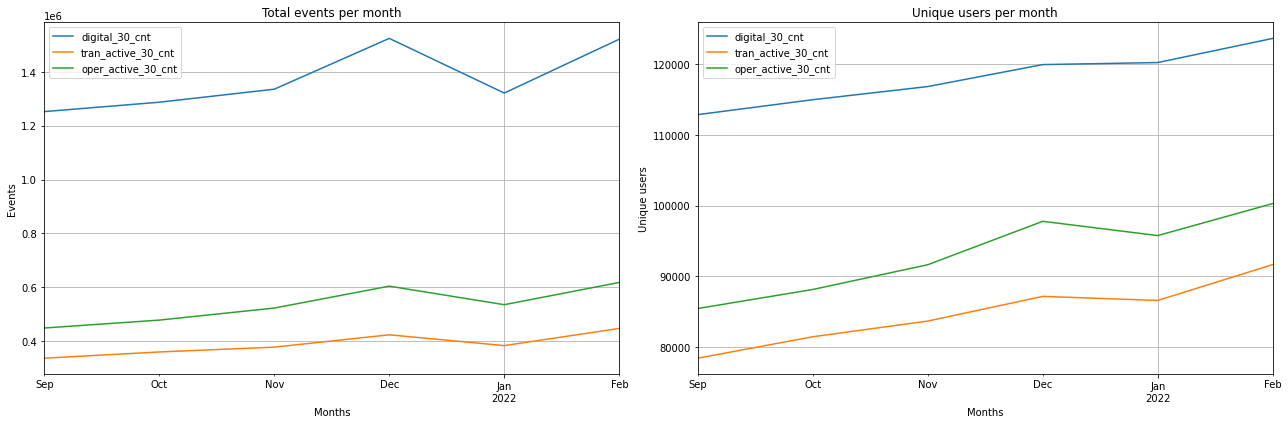

In [16]:
plt.figure(figsize=(18, 6)) # построим графики событий и числа пользователей
ax1 = plt.subplot(1, 2, 1)
ax1 = (events.plot( 
        ax=ax1, 
        grid=True,
   )
)

plt.ylabel('Events')
plt.xlabel('Months')
plt.title('Total events per month')

ax2 = plt.subplot(1, 2, 2)
ax2 = (users.plot( 
        ax=ax2, 
        grid=True,
   )
)

plt.ylabel('Unique users')
plt.xlabel('Months')
plt.title('Unique users per month')

plt.tight_layout()
plt.show()

In [17]:
display(events.describe()) # посмотрим статистику по месяцам 
users.describe()

,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
count,6.000000e+00,6.000000,6.000000
mean,1.373364e+06,387973.500000,534406.166667
std,1.190312e+05,40812.454858,67060.387215
min,1.252100e+06,336547.000000,448620.000000
25%,1.295430e+06,364191.000000,489185.500000
50%,1.328122e+06,380507.500000,528977.000000
75%,1.474576e+06,413429.750000,586830.750000
max,1.523914e+06,447123.000000,617826.000000


,digital_30_cnt,tran_active_30_cnt,oper_active_30_cnt
count,6.000000,6.000000,6.000000
mean,118112.833333,84791.500000,93157.333333
std,3944.506632,4679.883108,5773.566997
min,112885.000000,78372.000000,85414.000000
25%,115464.250000,81966.750000,88985.000000
50%,118419.500000,85095.500000,93682.000000
75%,120193.500000,86989.000000,97263.750000
max,123689.000000,91642.000000,100289.000000


Месячные колебания числа событий и пользователей невысоки, максимум - 10%.

### Выводы

1. Строка представляет собой ID клиента, последний день месяца и количество произошедших за него событий по клиенту. 
2. Скорее всего NaN указывается в случае если событий для клиента не было, если не было одного или двух типов событий отсутствие события обозначается 0. Учтем это в дальнейшем исследовании.
3. Число событий и пользователей по времени колеблется по месяцам не сильно - максимальный разброс менее 10%.

## Когортный анализ

### Расчет когорт

Распределим пользователей по когортам. Будем считать, что пользователь вошел в когоргу, когда в его строке вперые после NaN появилось число.

In [18]:
visits = log.pivot_table(index='client_id', columns='value_day', values='digital_30_cnt',  aggfunc='sum') # строим таблицу посещений по дням
visits.head(10) # смотрим результат

value_day,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28
client_id,,,,,,
8294,15,8,9,9,2,1
10609,35,18,10,40,33,38
15465,11,6,34,7,11,22
69014,13,8,6,10,21,15
100397,2,1,2,1,1,3
139646,0,0,0,0,<NA>,<NA>
141611,1,5,3,4,3,3
170152,4,3,3,1,1,0
200473,5,5,5,6,13,7


Рассчитаем номера когорт.

In [19]:
users = (visits.apply(lambda row: next((i for i, value in enumerate(row) if not pd.isna(value)), None) , axis=1)
               .reset_index(name='cohort')
               .set_index('client_id')
        ) # нумеруем пользователей по первому не NaN столбцу
users.sample(10) # смотрим результат

,cohort
client_id,
2120099379,0
4275530327,0
792379645,0
3283578197,1
2016540768,0
282822343,0
1659582834,2
2594887036,0
2556142489,0


Посмотрим размеры когорт.

In [20]:
users.value_counts(sort=False) # смотрим размеры когорт.

cohort
0         129232
1           7044
2           5841
3           6875
4          14770
5           5330
dtype: int64

Скорее всего в первую когорту вошли все клиенты на дату начала исследования, учтем это в ходе исследования. Размеры остальных когорт несколько тысяч человек, самая маленькая - 5330 чел.

### Расчет и визуализация удержания

Создадим функцию для расчета таблицы удержания и ее визуализации.

In [21]:
def show_retention(visits_, group):
    '''
    Рассчитывет удержание таблицы visits_, выводит графики для групп group
    '''
    if group != 'Active': # если считаем на активных пользователей то
        visits_.replace(0,np.nan, inplace=True) # заменим нули на NaN
    visits_ = visits_.join(users, on='client_id', how='left') # добавим номера когорт
    tri_table = visits_.groupby('cohort').agg('count') # сгруппируем по когортам
    tri_table= (tri_table.reset_index()
                .apply(lambda x: x.shift(-1*x['cohort'].astype(int)), axis=1)
                .drop(['cohort'], axis=1)
                .reset_index()
               ) # сдвинем таблицу по лайфтаймам
    new_col = ['cohort',1,2,3,4,5,6] # пронумеруем лайфтаймы
    tri_table.columns = new_col
    tri_table['cohort_size'] = tri_table.apply(lambda row: max(row), axis=1) # рассчитаем размеры когорт
    #print(tri_table)
    retention = tri_table.iloc[:,1:-1].div(tri_table['cohort_size'], axis=0) # рассчитаем удержание
    
    plt.figure(figsize=(18, 6)) # построим график удержания и тепловую карту
    ax1 = plt.subplot(1, 2, 1)
    ax1 = (retention.T.plot( 
            colormap='tab10', 
            ax=ax1,
            grid=True,
       )
    )
    plt.xlabel('Lifetime')
    plt.ylabel('Retention')
    plt.title('Retention by months of group '+group)
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.heatmap(retention, annot=True, fmt='.2%')  # строим тепловую карту
    plt.title('Retention heatmap of group '+group)
    plt.xlabel('Lifetime')
    plt.ylabel('Cohort')
    plt.tight_layout()
    plt.show()

Рассчитаем удержание для групп и построим графики.

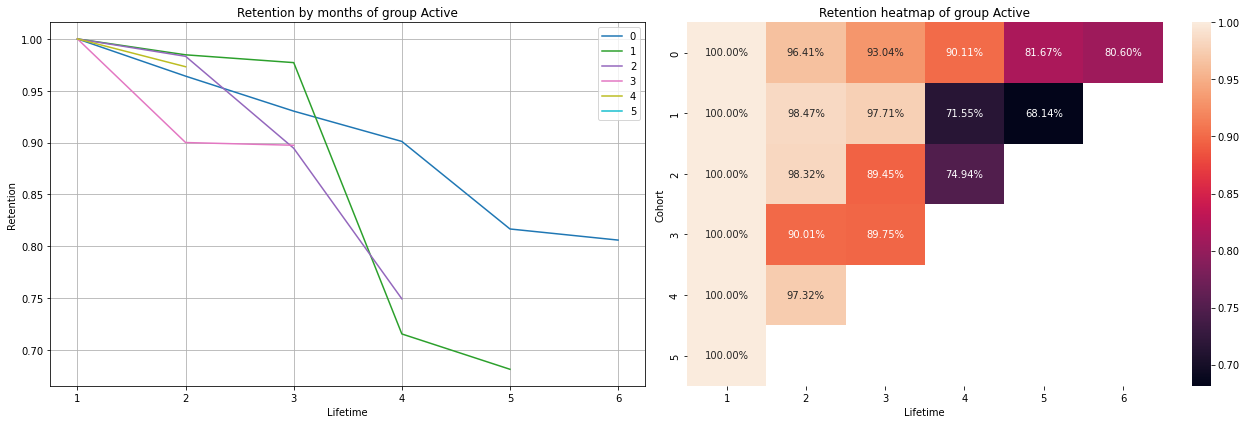

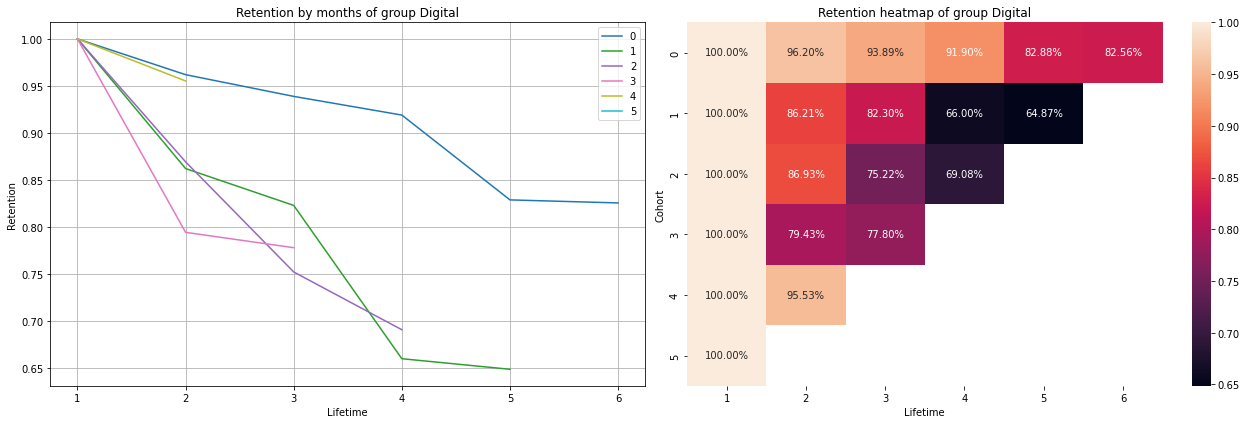

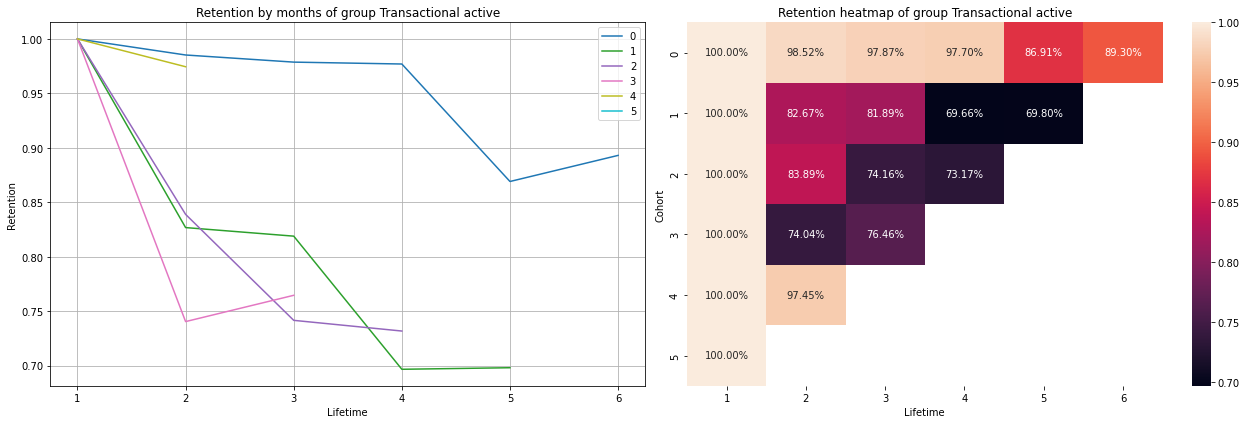

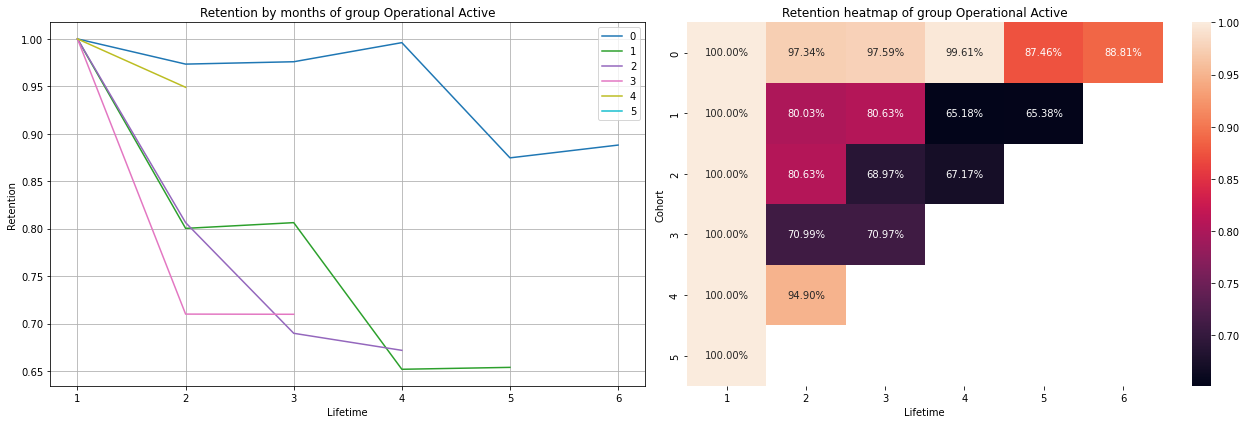

In [22]:
show_retention(log.pivot_table(index='client_id', columns='value_day', values='digital_30_cnt',  aggfunc='sum'), 'Active')
show_retention(log.pivot_table(index='client_id', columns='value_day', values='digital_30_cnt',  aggfunc='sum'), 'Digital')
show_retention(log.pivot_table(index='client_id', columns='value_day', values='tran_active_30_cnt',  aggfunc='sum'), 'Transactional active')
show_retention(log.pivot_table(index='client_id', columns='value_day', values='oper_active_30_cnt',  aggfunc='sum'), 'Operational Active')

Мы видим, что удержание активных клиентов ускоряет падение с третьего месяца. В остальных группах падение начинается резко, но со второго месяца замедляется.
Возможно это связано с тем, что происходит отток клиентов, не перешедших в другие группы (у них меньше стимулов быть клиентами). Остальные осваиваются с приложением, заводят новые продукты и начинают ими пользоваться - падение удержания снижается.
Проверить эту гипотезу можно сравнив уровень оттока у не диджитал и диджтал клиентов.

Можно выделить две проблемы - низкая вовлеченность активных клиентов, и быстрый отток из остальных групп.
Увеличить вовлеченность активных клиентов можно адаптацией линейки продуктов и повышением персонализации клиентской коммуникации.
Высокий отток на первых месяцах может показывать, что приложение тяжело в освоении, неудобно, отсутствуют необходимые продукты и фичи. Исправить ситуацию можно улучшением онбординга, введением игровой активности, выработкой у пользователя рутин, поиском и внедрением необходимых пользователю элементов.

### Выводы

1. Мы распределили пользователей по когортам по месяцам активации. Мы считали, что пользователь вошел в когоргу, когда в его строке вперые после NaN появилось число
2. Размер первой когорты - 129232 чел. Скорее всего в первую когорту вошли все клиенты на дату начала исследования, учтем это в ходе исследования. Размеры остальных когорт несколько тысяч человек, самая маленькая - 5330 чел.
3. Для расчета таблицы удержания и ее визуализации мы создали специальную функцию.
4. Для каждой из групп мы рассчитали удержание и построили графики.
5. Из результатов мы увидали, что удержание активных клиентов ускоряет падение с третьего месяца. В остальных группах падение начинается резко, но со второго месяца замедляется.
6. Возможно это связано с тем, что происходит отток клиентов, не перешедших в другие группы (у них меньше стимулов быть клиентами). Остальные осваиваются с приложением, заводят новые продукты и начинают ими пользоваться - падение удержания снижается. Проверить эту гипотезу можно сравнив уровень оттока у не диджитал и диджтал клиентов.
7. Результаты показывают две проблемы - низкую вовлеченность активных клиентов, и быстрый отток из остальных групп.
8. Увеличить вовлеченность активных клиентов можно адаптацией линейки продуктов и повышением персонализации клиентской коммуникации.
9. Высокий отток на первых месяцах может показывать, что приложение тяжело в освоении, неудобно, отсутствуют необходимые продукты и фичи. Исправить ситуацию можно улучшением онбординга, введением игровой активности, выработкой у пользователя рутин, поиском и внедрением необходимых пользователю элементов.

## Анализ проникновения

Исследуем проникновение диджитал активных в операционно активных клиентов.

Создадим функцию для анализа проникновения.

In [25]:
def show_penetration(visits_1, visits_2, title_1, title_2):
    '''
    Рассчитывает и визуализирует проникновение группы title_1 в title_2.
    visits_1, visits_2 - данные по месяцам по визитам клиентов
    '''
    visits_1 = visits_1.join(users, on='client_id', how='left') # добавим номера когорт
    visits_2 = visits_2.join(users, on='client_id', how='left') # добавим номера когорт
    tri_table_1 = visits_1.groupby('cohort').agg('count') # сгруппируем по когортам
    tri_table_2 = visits_2.groupby('cohort').agg('count') # сгруппируем по когортам
    tri_table_1 = (tri_table_1.reset_index()
                .apply(lambda x: x.shift(-1*x['cohort'].astype(int)), axis=1)
                .drop(['cohort'], axis=1)
                .reset_index()
               ) # сдвинем таблицу по лайфтаймам
    tri_table_2 = (tri_table_2.reset_index()
                .apply(lambda x: x.shift(-1*x['cohort'].astype(int)), axis=1)
                .drop(['cohort'], axis=1)
                .reset_index()
               ) # сдвинем таблицу по лайфтаймам
    new_col = ['cohort',1,2,3,4,5,6] # пронумеруем лайфтаймы
    tri_table_1.columns = new_col
    tri_table_2.columns = new_col
    penetration = tri_table_2.div(tri_table_1).drop('cohort', axis=1) # рассчитаем проникновение
    plt.figure(figsize=(18, 6)) # построим график удержания и тепловую карту
    ax1 = plt.subplot(1, 2, 1)
    ax1 = (penetration.T.plot( 
            colormap='tab10', 
            ax=ax1,
            grid=True,
       )
    )
    plt.xlabel('Lifetime')
    plt.ylabel('Ratio of '+title_1.lower()+' in '+title_2)
    plt.title(title_1+' to '+title_2+' penetration by months')
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.heatmap(penetration, annot=True, fmt='.2%')  # строим тепловую карту
    plt.title(title_1+' to '+title_2+' penetration heatmap')
    plt.xlabel('Lifetime')
    plt.ylabel('Cohort')
    plt.tight_layout()
    plt.show()

Рассчитаем и визуализируем проникновение диджитал активных в операционно активных клиентов.

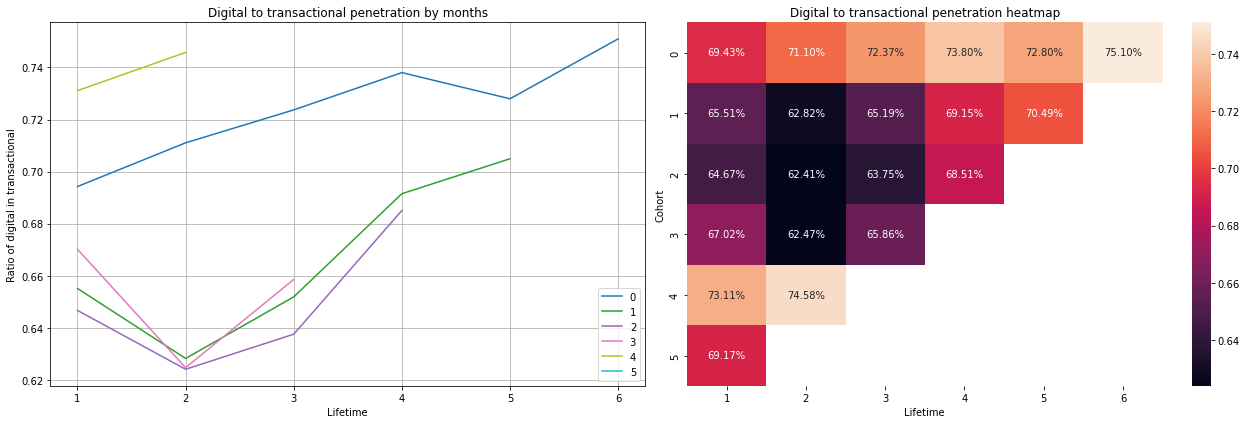

In [26]:
show_penetration(log.pivot_table(index='client_id', columns='value_day', values='digital_30_cnt',  aggfunc='sum').replace(0,np.nan), 
                 log.pivot_table(index='client_id', columns='value_day', values='tran_active_30_cnt',  aggfunc='sum').replace(0,np.nan),
                 'Digital','transactional'
                )

Проникновение диджитал активных в операционно активных сначала снижается, а с второго месяца начинает расти. Это может быть вызвано тем, что диджитал активные клиенты пользуются продуктами не требующими регулярного совершения операций, либо затрудняются с выбором и открытием новых продуктов.
Эта гипотеза может быть проверена сравнением групп диджитал и операцонно активных клиентов по используемым продуктам, срокам с активации до открытия продуктов.

Увеличить проникновение помогут следующие мероприятия:
* предложение привлекательных карточные продуктов, стимулирующих совершать больше платежей и переводов;
* повышение удобства платежей и переводов в приложение, повышение числа сценариев для переводов;
* усиление работы по онбордингу в новые функции.

### Выводы

1. Для анализа проникновения диджитал активных в операционно активных клиентов мы создали специальную функцию.
2. С ее помощью мы рассчитали и визуализируовали проникновение диджитал активных в операционно активных клиентов.
3. Проникновение диджитал активных в операционно активных сначала снижается, а с второго месяца начинает расти. Это может быть вызвано тем, что диджитал активные клиенты пользуются продуктами не требующими регулярного совершения операций, либо затрудняются с выбором и открытием новых продуктов. Эта гипотеза может быть проверена сравнением групп диджитал и операцонно активных клиентов по используемым продуктам, срокам с активации до открытия продуктов.
4. Увеличить проникновение помогут следующие мероприятия:
    * предложение привлекательных карточных продуктов, стимулирующих совершать больше платежей и переводов;
    * повышение удобства платежей и переводов в приложение, повышение числа сценариев для переводов;
    * усиление работы по онбордингу в новые функции.

## Общие выводы

1. Мы решили, что данных достаточно для решения поставленных задач.
2. В таблице есть пропуски, это вызвано тем, что не все активные клиенты (наличие строки для клиента на отчетную дату) пользуются мобильным приложением (являются диджитал активными). Пропуски содержат важную для исследования информацию, оставим их без изменения.
3. Типы данных во всех столбцах различаются. В таблицах столбец value_day содержащие даты мы конвертировали в формат datetime. Столбцы с количеством событий привели к целому значению.
4. Мы привели названия столбцов в соответствие с правилами именования: все символы сделали строчными.
5. **Для клиента с id 1813118018 дублируются записи за январь и февраль 2022 года. Возможно это вызвано уточнением информации, возможно это техническая ошибка. Обращаем внимание коллег, что нужно установить причину дублирования.** Из дублирующихся данных удалили повторяющиеся строки.
6. Мы установили, что строка представляет собой ID клиента, последний день месяца и количество произошедших за него событий по клиенту. Скорее всего NaN указывается в случае если событий для клиента не было, если не было одного или двух типов событий отсутствие события обозначается 0. Мы учли это в дальнейшем.
7. Число событий и пользователей по времени колеблется по месяцам не сильно - максимальный разброс менее 10%.
8. Мы распределили пользователей по когортам по месяцам активации. Мы считали, что пользователь вошел в когоргу, когда в его строке вперые после NaN появилось число
9. Размер первой когорты - 129232 чел. Скорее всего в первую когорту вошли все клиенты на дату начала исследования, мы учли это в ходе исследования. Размеры остальных когорт несколько тысяч человек, самая маленькая - 5330 чел.
10. Для расчета таблицы удержания и ее визуализации мы создали специальную функцию.
11. Для каждой из групп мы рассчитали удержание и построили графики.
12. Из результатов мы увидали, что **удержание активных клиентов ускоряет падение с третьего месяца. В остальных группах падение начинается резко, но со второго месяца замедляется**.
13. **Возможно это связано с тем, что происходит отток клиентов, не перешедших в другие группы (у них меньше стимулов быть клиентами). Остальные осваиваются с приложением, заводят новые продукты и начинают ими пользоваться - падение удержания снижается. Проверить эту гипотезу можно сравнив уровень оттока у не диджитал и диджтал клиентов.**
14. **Результаты показывают две проблемы - низкую вовлеченность активных клиентов, и быстрый отток из остальных групп.
    * Увеличить вовлеченность активных клиентов можно адаптацией линейки продуктов и повышением персонализации клиентской коммуникации.
    * Высокий отток на первых месяцах может показывать, что приложение тяжело в освоении, неудобно, отсутствуют необходимые продукты и фичи. Исправить ситуацию можно улучшением онбординга, введением игровой активности, выработкой у пользователя рутин, поиском и внедрением необходимых пользователю фич.**
15. Для анализа проникновения диджитал активных в операционно активных клиентов мы создали специальную функцию, с ее помощью мы рассчитали и визуализируовали проникновение диджитал активных в операционно активных клиентов.
16. **Проникновение диджитал активных в операционно активных сначала снижается, а с второго месяца начинает расти. Это может быть вызвано тем, что диджитал активные клиенты пользуются продуктами не требующими регулярного совершения операций, либо затрудняются с выбором и открытием новых продуктов. Эта гипотеза может быть проверена сравнением групп диджитал и операцонно активных клиентов по используемым продуктам, срокам с активации до открытия продуктов.**
17. **Увеличить проникновение помогут следующие мероприятия:**
    * **предложение привлекательных карточных продуктов, стимулирующих совершать больше платежей и переводов;**
    * **повышение удобства платежей и переводов в приложение, повышение числа сценариев для переводов;**
    * **усиление работы по онбордингу в новые функции.**